In [3]:
import pandas as pd
import os
import glob
import tables
import numpy as np
import gc
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 8]



In [11]:
data_dir = "./data/clusterdata-2011-2/"

task_events_header = ['timestamp','missing_info', 'job_id','task_index','machine_id','event_type',
                      'user_name','scheduling_class','priority','cpu_req','ram_req','disk_space_req','different_machine']
task_events_header_filtered = ['timestamp','event_type',
                      'priority','cpu_req','ram_req','disk_space_req','different_machine','task_key', 'time_taken']

In [2]:
name = "./data/clusterdata-2011-2/task_events/part-00208-of-00500.filtered.csv.gz"
df = pd.read_csv(name)

In [22]:
df[df['task_key'] == "1329653148-17"]

,timestamp,event_type,priority,cpu_req,ram_req,disk_space_req,different_machine,task_key
107532,1047899499614,0,10,0.0625,0.004662,0.000008,0,1329653148-17


In [ ]:
# count = 0
# final_df = pd.DataFrame()

# for name in glob.glob(data_dir+"task_events/*.csv.gz"):
#     print(name)
#     df = pd.read_csv(name, header=None)
#     df.columns = task_events_header
#     df['task_key'] = df['job_id'].astype(str) +'-'+ df['task_index'].astype(str) 
#     df = df[pd.isnull(df['missing_info']) == True]
#     df = df.loc[(df['event_type']==0) | (df['event_type']==4)]
#     df.drop(
#         [
#             "user_name", "machine_id", "job_id", "task_index",
#             "scheduling_class", "missing_info"
#         ],
#         axis=1,
#         inplace=True)
    
#     df.to_csv(name.replace(".csv", ".filtered.csv"), index=False, compression='gzip')
        
#     count += 1
# #     break
    
# print (count, "files processed")

In [31]:
count = 0
final_df = pd.DataFrame(columns=task_events_header_filtered)

## better idea then iteration, groupby on the [task_key, event_type] and take max time_stamp
## then separate the event==0 and event==4 
## then join and calculate time taken

for name in glob.glob(data_dir+"task_events/*.filtered.csv.gz"):
    print(name)
    df = pd.read_csv(name)
    
    for i, row in tqdm(df.iterrows()):
        ## If event type 0, 
#         print (row)
        if row["event_type"] == 0:
            ## if jobid present and not completed, then update
            index = final_df[final_df["task_key"] == row["task_key"]].index
            if index.any() and final_df.loc[index]['event_type']==0:
                final_df.loc[index] = row
                
            ## otherwise, add
            else: ## jobid absent
            ## while adding the row to the final_df, write time_taken = timestamp
                index = len(final_df)
                final_df.loc[index] =  row
                final_df.loc[index]['time_taken'] = row["timestamp"]
                
                
        ## If event type 4,
        if row["event_type"] == 4:
            ## add the value for time taken

            final_df.loc[final_df['task_key'] == row["task_key"], 'time_taken'] -= row["timestamp"]

    count += 1
#     if count == 50:
    break
    
print (count, "files processed")

# storename = data_dir+"task_events/"+"processed.h5"
# print ("Writing the data for processed jobs to ", storename)

# store = pd.HDFStore(storename)
# store['df'] = final_df
# store.close()

# print ("Task Completed")

./data/clusterdata-2011-2/task_events/part-00000-of-00500.filtered.csv.gz


979it [01:21, 12.07it/s]

KeyboardInterrupt: 

In [8]:
final_df

,timestamp,missing_info,job_id,task_index,machine_id,event_type,user_name,scheduling_class,priority,cpu_req,ram_req,disk_space_req,different_machine


In [3]:
count = 0
final_df = pd.DataFrame()

## better idea then iteration, groupby on the [task_key, event_type] and take max time_stamp
## then separate the event==0 and event==4 
## then join and calculate time taken

for name in glob.glob(data_dir+"task_events/*.filtered.csv.gz"):
    print(name)
    df = pd.read_csv(name)
        
#     df = df.loc[df['event_type']==0]

    final_df = final_df.append(df)
    count += 1
    if count == 200:
        break
    
print (count, "files appended")

storename = data_dir+"task_events/"+"appended.h5"
print ("Writing the data to ", storename)

store = pd.HDFStore(storename)
store['df'] = final_df
store.close()

print ("Task Completed")

./data/clusterdata-2011-2/task_events/part-00000-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00001-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00002-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00003-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00004-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00005-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00006-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00015-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00016-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00017-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00018-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00019-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00020-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/

./data/clusterdata-2011-2/task_events/part-00197-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00198-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00199-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00200-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00201-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00202-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00203-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00204-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00205-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00206-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00207-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00208-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/part-00209-of-00500.filtered.csv.gz
./data/clusterdata-2011-2/task_events/

In [13]:
final_df[final_df["task_key"] == '1005190908-4']

,timestamp,event_type,priority,cpu_req,ram_req,disk_space_req,different_machine,task_key
1165,0,0,10,0.04376,0.003975,0.000019,1.0,1005190908-4
40302,693364066812,0,10,0.04376,0.003975,0.000019,1.0,1005190908-4
29372,703111693103,0,10,0.04376,0.003975,0.000019,1.0,1005190908-4
76806,1039085821399,0,10,0.04376,0.003975,0.000019,1.0,1005190908-4
21415,1549929978685,0,10,0.04376,0.003975,0.000019,1.0,1005190908-4
165016,2115112258433,0,10,0.04376,0.003975,0.000019,1.0,1005190908-4
58461,354150400311,0,10,0.04376,0.003975,0.000019,1.0,1005190908-4


In [31]:
grouped_df = final_df.groupby(by=['task_key']).filter(lambda g: g['event_type'].count() == 2)

In [9]:
del final_df
gc.collect()

2412

In [7]:
grouped_df = pd.read_hdf(data_dir+"task_events/grouped.h5")

In [8]:
keys = grouped_df[grouped_df['event_type']==4]['task_key']

In [9]:
grouped_df = grouped_df[grouped_df["task_key"].isin(keys)]

In [12]:
grouped_df = grouped_df[grouped_df['timestamp'] != 0]

In [13]:
storename = data_dir+"task_events/"+"grouped.h5"
print ("Writing the data to ", storename)

store = pd.HDFStore(storename)
store['df'] = grouped_df
store.close()

print ("Task Completed")

Writing the data to  ./data/clusterdata-2011-2/task_events/grouped.h5
Task Completed


In [12]:
grouped_df = pd.read_hdf(data_dir+"task_events/grouped.h5")

In [13]:
submitted = grouped_df[grouped_df['event_type'] == 0]
finished = grouped_df[grouped_df['event_type'] == 4]

In [14]:
submitted[~submitted['task_key'].isin(finished['task_key'])]

,timestamp,event_type,priority,cpu_req,ram_req,disk_space_req,different_machine,task_key


In [15]:
grouped_df[grouped_df['task_key'] == '3418375-0']

,timestamp,event_type,priority,cpu_req,ram_req,disk_space_req,different_machine,task_key


In [8]:
df = pd.read_csv(data_dir + "machine_events/part-00000-of-00001.csv.gz",header=None)
df.columns = machine_events_header

In [12]:
grouped_df.shape

,timestamp,machine_id,event_type,platform_id,cpu_cap,mem_cap
12477,779231019,5782512,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.2493
12479,1460219913,4820073668,1,GtXakjpd0CD41brK7k/27s3Eby3RpJKy7taB9S8UQRA=,1.0,1.0000
12480,2071421510,1272981,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.4995
12481,2580105468,294985247,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.2493
12483,3016500490,8631300,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.4995
12496,4018106649,317808289,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.2493
12498,4617561765,705636,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.4995
12504,5788416835,3314598368,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.4995
12505,5991643758,39146853,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.2493
12506,6384948492,711934,1,HofLGzk1Or/8Ildj2+Lqv0UGGvY82NLoni8+J/Yy0RU=,0.5,0.4995


In [17]:
submitted.shape

(6512576, 8)

In [18]:
finished.shape

(6521941, 8)

In [19]:
finished_jobs = submitted.merge(right=finished, on=['task_key'], how='inner')

In [20]:
finished_jobs['time_taken'] = finished_jobs['timestamp_y'] - finished_jobs['timestamp_x']

In [21]:
finished_jobs.drop(
    [
        'event_type_x', 'timestamp_y', 'event_type_y', 
        'priority_y', 'cpu_req_y', 'ram_req_y', 'disk_space_req_y', 
        'different_machine_y'
    ],
    axis=1,
    inplace=True
)

In [22]:
finished_jobs['time_taken'] = finished_jobs['time_taken']/1000000

In [23]:
finished_jobs

,timestamp_x,priority_x,cpu_req_x,ram_req_x,disk_space_req_x,different_machine_x,task_key,time_taken
0,604046280,9,0.062500,0.015900,3.815000e-06,0.0,6251639646-0,71.205425
1,612141654,0,0.062500,0.004662,7.629000e-06,0.0,6251668759-0,50.124820
2,617115446,1,0.031250,0.015900,3.815000e-05,0.0,6251668917-0,36.169218
3,619396393,2,0.006248,0.001554,9.537000e-07,0.0,6251668761-0,29.633532
4,633214031,2,0.006248,0.003109,9.537000e-06,0.0,6251668915-0,54.648233
5,633230954,2,0.031250,0.011250,7.629000e-06,0.0,6251669132-0,35.345963
6,641927978,1,0.012500,0.015900,1.049000e-05,0.0,6251669667-0,385.920992
7,653284671,1,0.031250,0.015900,3.815000e-05,0.0,6251668940-0,33.029739
8,664711821,9,0.062500,0.103400,3.815000e-05,0.0,6251670402-0,532.274201
9,680344770,8,0.024990,0.033390,3.862000e-04,0.0,6251500408-0,658.207719


In [24]:
finished_jobs.columns = ['timestamp', 'priority', 'cpu_req', 'ram_req', 'disk_space_req', 'different_machine', 'task_key', 'time_taken']

In [25]:
store = pd.HDFStore('features.h5')
store['df'] = finished_jobs
store.close()


In [26]:
del finished_jobs
gc.collect()

2466

## Linear Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.decomposition import PCA

In [5]:
features = pd.read_hdf('features.h5')

In [6]:
features['time_taken'] = features["time_taken"]/60

In [7]:
q3, q1 = np.percentile(features.time_taken, [75, 25])

IQR = q3-q1

min_time = q1 - (IQR*1.5)
max_time = q3 + (IQR*1.5)

In [8]:
features = features[(features["time_taken"]>min_time) & (features["time_taken"]<max_time)]

In [9]:
features.shape

(5800265, 7)

In [26]:
feature_list = ['priority', 'cpu_req', 'ram_req', 'disk_space_req', 'different_machine']
y = features['time_taken'].as_matrix()
X = features[feature_list].as_matrix()

In [27]:
poly = PolynomialFeatures(4, interaction_only=True)

X = poly.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [29]:
model_norm = LinearRegression( normalize=True, n_jobs=-1)
model = LinearRegression( n_jobs=-1)

# pca = PCA(n_components=4)
# X_train = pca.fit_transform(X_train)

# for i in range(10):
model_norm.fit(X_train, y_train)
model.fit(X_train, y_train)

# X_test = pca.transform(X_test)

y_pred_norm = model_norm.predict(X_test)
y_pred = model.predict(X_test)



In [30]:
print (mean_squared_error(y_test, y_pred))
# print mean_squared_log_error(y_test, y_pred)

print (mean_squared_error(y_test, y_pred_norm))
# print mean_squared_log_error(y_test, y_pred_norm)

74.0966201953684
74.09662018990126


In [16]:
X_test.shape

(1160053, 31)

In [17]:
y_pred.shape

(1160053,)

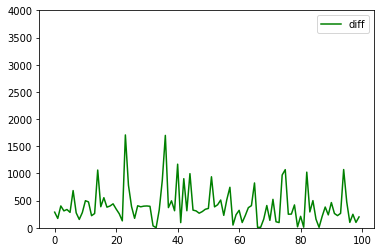

In [18]:
# Plot outputs
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(np.arange(100), y_pred[:100], color='blue', label='predicted')
# plt.plot(np.arange(100), y_test[:100], color='red', label='true')
plt.plot(np.arange(100), np.fabs(y_pred[:100]-y_test[:100]), color='g', label='diff')
# plt.xticks(())
# plt.yticks(())
plt.ylim([0, 4000])

plt.legend()

plt.show()